# Feature engineering

In [1]:
# start a spark application

# Defining the environment variables for EC2 Linux instance
#import os
#import sys

# Here you need to have same Python version on your local machine and on worker node i.e. EC2. here both should have python3.
#os.environ["PYSPARK_PYTHON"] = "/bin/python3"
#                  OR
#os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3"

#os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
#os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
#os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
#sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
#sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# Defining the environment variables for Windows 10 instance
import os
import sys
os.environ["PYSPARK_PYTHON"] = "D:/Anaconda3/python"
os.environ["JAVA_HOME"] = "C:/Program Files/Java/jdk1.8.0_251/jre"
os.environ["SPARK_HOME"] = "D:/spark-2.4.4-bin-hadoop2.7"
os.environ["HADOOP_HOME"] = "D:/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# Creating Spark Session 
from pyspark import SparkContext
from pyspark.sql import SparkSession
SparkContext.setSystemProperty('spark.executor.memory', '4g')
spark = SparkSession.builder.appName('LR_FeatureEngg_ThresholdSelection').getOrCreate()
spark

In [2]:
# read the data 

#df = sqlContext.read.csv('s3a://logistic-data/1l.csv', header=True, inferSchema=True)
df = spark.read.csv('1l.csv', header=True, inferSchema=True)
print(df.count())
df.show(3, truncate=False)

99999
+-----+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+
|click|C1  |banner_pos|site_id |site_domain|site_category|app_id  |app_domain|app_category|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |
+-----+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+
|false|1005|1         |856e6d3f|58a89a43   |f028772b     |ecad2386|7801e8d9  |07d7df22    |a99f214a |962c8333 |be6db1d7    |1          |0               |22683|320|50 |2528|0  |39 |100075|221|10   |1        |28 |14  |0  |
|true |1005|1         |e151e245|7e091613   |f028772b     |ecad2386|7801e8d9  |07d7df22    |a99f214a |5b1f94b9 

In [3]:
from pyspark.sql.types import IntegerType
df = df.withColumn('y', df['click'].cast(IntegerType()))
df = df.drop('click')

In [4]:
# select the columns 'site_id','site_domain','site_category','app_id','app_domain','app_category' and display them, 
# so that you can analyse the values as they were shown in the segment

df.select('site_id','site_domain','site_category','app_id','app_domain','app_category').show(truncate=False)

+--------+-----------+-------------+--------+----------+------------+
|site_id |site_domain|site_category|app_id  |app_domain|app_category|
+--------+-----------+-------------+--------+----------+------------+
|856e6d3f|58a89a43   |f028772b     |ecad2386|7801e8d9  |07d7df22    |
|e151e245|7e091613   |f028772b     |ecad2386|7801e8d9  |07d7df22    |
|e3c09f3a|d262cf1e   |28905ebd     |ecad2386|7801e8d9  |07d7df22    |
|0da94452|248e439f   |50e219e0     |ecad2386|7801e8d9  |07d7df22    |
|1fbe01fe|f3845767   |28905ebd     |ecad2386|7801e8d9  |07d7df22    |
|d9750ee7|98572c79   |f028772b     |ecad2386|7801e8d9  |07d7df22    |
|83a0ad1a|5c9ae867   |f028772b     |ecad2386|7801e8d9  |07d7df22    |
|85f751fd|c4e18dd6   |50e219e0     |98fed791|d9b5648e  |0f2161f8    |
|85f751fd|c4e18dd6   |50e219e0     |fc6dc16f|5c5a694b  |0f2161f8    |
|1fbe01fe|f3845767   |28905ebd     |ecad2386|7801e8d9  |07d7df22    |
|1fbe01fe|f3845767   |28905ebd     |ecad2386|7801e8d9  |07d7df22    |
|57fe1b20|5b626596  

In [6]:
# create 3 new columns in the dataframe named 'pub_id','pub_domain','pub_category' 
# these columns will have the data from 'site_id','site_domain','site_category'
# Use the withColumn method 

df = df.withColumn('pub_id', df['site_id'])
df = df.withColumn('pub_domain', df['site_domain'])
df = df.withColumn('pub_category', df['site_category'])
df.show(3, truncate=False)

+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+
|C1  |banner_pos|site_id |site_domain|site_category|app_id  |app_domain|app_category|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |pub_id  |pub_domain|pub_category|
+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+
|1005|1         |856e6d3f|58a89a43   |f028772b     |ecad2386|7801e8d9  |07d7df22    |a99f214a |962c8333 |be6db1d7    |1          |0               |22683|320|50 |2528|0  |39 |100075|221|10   |1        |28 |14  |0  |856e6d3f|58a89a43  |f028772b    |
|1005|1 

In [7]:
# replace the values in the columns 'pub_id','pub_domain','pub_category' with the values 'app_id','app_domain','app_category'
# the replacement should only happen if the value in site_id is '85f751fd'
# you will need withColumn and when functions

from pyspark.sql.functions import col, when
df = df.withColumn('pub_id', when(col('site_id') == '85f751fd', col('app_id')).otherwise(col('site_id')))
df = df.withColumn('pub_domain', when(col('site_id') == '85f751fd', col('app_domain')).otherwise(col('site_domain')))
df = df.withColumn('pub_category', when(col('site_id') == '85f751fd', col('app_category')).otherwise(col('site_category')))
df.show(3, truncate=False)

+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+
|C1  |banner_pos|site_id |site_domain|site_category|app_id  |app_domain|app_category|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |pub_id  |pub_domain|pub_category|
+----+----------+--------+-----------+-------------+--------+----------+------------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+
|1005|1         |856e6d3f|58a89a43   |f028772b     |ecad2386|7801e8d9  |07d7df22    |a99f214a |962c8333 |be6db1d7    |1          |0               |22683|320|50 |2528|0  |39 |100075|221|10   |1        |28 |14  |0  |856e6d3f|58a89a43  |f028772b    |
|1005|1 

In [8]:
# drop all the columns which are now redundunt

df = df.drop('site_id','site_domain','site_category','app_id','app_domain','app_category')
df.show(3, truncate=False)

+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+
|C1  |banner_pos|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |pub_id  |pub_domain|pub_category|
+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+
|1005|1         |a99f214a |962c8333 |be6db1d7    |1          |0               |22683|320|50 |2528|0  |39 |100075|221|10   |1        |28 |14  |0  |856e6d3f|58a89a43  |f028772b    |
|1005|1         |a99f214a |5b1f94b9 |1b13b020    |1          |0               |17037|320|50 |1934|2  |39 |-1    |16 |10   |2        |22 |19  |1  |e151e245|7e091613  |f028772b    |
|1005|0         |a99f214a |a9a84f4c |9a45a8e8    |1          |0               |22155|320|50 |2552|3 

In [9]:
# check the frequency of each category in device_id. did you get a similar distribution to the one shown in the segment? 
# use groupBy and count

from pyspark.sql.functions import desc
df.groupby('device_id').count().sort(desc('count')).show(truncate=False)

+---------+-----+
|device_id|count|
+---------+-----+
|a99f214a |82579|
|c357dbff |62   |
|0f7c61dc |51   |
|afeffc18 |34   |
|936e92fb |27   |
|cef4c8cc |12   |
|28dc8687 |11   |
|d857ffbb |9    |
|9af87478 |9    |
|02da5312 |8    |
|987552d1 |7    |
|b09da1c4 |7    |
|03559b29 |6    |
|3cdb4052 |6    |
|abab24a7 |5    |
|1168ce02 |5    |
|243bd3ab |4    |
|69401309 |4    |
|d2e4c0ab |4    |
|2c112522 |4    |
+---------+-----+
only showing top 20 rows



In [10]:
# combine device_ip and device_model to form a new column which can identify users. 
# name the new column 'user' with data from device_id

# In that column whereever the device_id is missing use a combination of device_ip and device_model
# You will have to use the withcolumn along with a when condition. 
# You will the combination of device ip and device model can be done using the following code. 
from pyspark.sql import functions as sf
#sf.concat(sf.col('device_ip'),sf.lit('-'),sf.col('device_model'))

# use this code inside a when condition
df = df.withColumn('user', when(col('device_id') == 'a99f214a',
                                  sf.concat(sf.col('device_ip'),sf.lit('-'),sf.col('device_model')))
                                 .otherwise(col('device_id')))
df.show(3, truncate=False)

+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+-----------------+
|C1  |banner_pos|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |pub_id  |pub_domain|pub_category|user             |
+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+-----------------+
|1005|1         |a99f214a |962c8333 |be6db1d7    |1          |0               |22683|320|50 |2528|0  |39 |100075|221|10   |1        |28 |14  |0  |856e6d3f|58a89a43  |f028772b    |962c8333-be6db1d7|
|1005|1         |a99f214a |5b1f94b9 |1b13b020    |1          |0               |17037|320|50 |1934|2  |39 |-1    |16 |10   |2        |22 |19  |1  |e151e245|7e091613  |f028772b    |5b1f94b9-1b13b020|
|1005|0   

In [11]:
# find the frequency of each category in the user column, save this frequency in a new column in the data frame
# join this dataframe with the earlier df, make sure that when you join, all the rows
# from the original table need to be present in the final table as well.
# use the join table command

user_counts = df.groupby('user').count().select(col('user'), col('count').alias('user_freq'))
df = df.join(user_counts, on=['user'], how='left')
df.show(3, truncate=False)

+-----------------+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+---------+
|user             |C1  |banner_pos|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |pub_id  |pub_domain|pub_category|user_freq|
+-----------------+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+---------+
|962c8333-be6db1d7|1005|1         |a99f214a |962c8333 |be6db1d7    |1          |0               |22683|320|50 |2528|0  |39 |100075|221|10   |1        |28 |14  |0  |856e6d3f|58a89a43  |f028772b    |1        |
|5b1f94b9-1b13b020|1005|1         |a99f214a |5b1f94b9 |1b13b020    |1          |0               |17037|320|50 |1934|2  |39 |-1    |16 |10   |2        |22 |19  |1  |e151

In [12]:
# combine user and hour column to make a new columns user-hour. 
# again add a column with the frequency of occurance of each user-hour combination

df = df.withColumn('user_hour', sf.concat(sf.col('user'),sf.lit('_'),sf.col('hour')))
user_hour_counts = df.groupby('user_hour').count().select(col('user_hour'), col('count').alias('user_hour_freq'))
df = df.join(user_hour_counts, on=['user_hour'], how='left')
df.show(3, truncate=False)

+--------------------+-----------------+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+---------+--------------+
|user_hour           |user             |C1  |banner_pos|device_id|device_ip|device_model|device_type|device_conn_type|C14  |C15|C16|C17 |C18|C19|C20   |C21|month|dayofweek|day|hour|y  |pub_id  |pub_domain|pub_category|user_freq|user_hour_freq|
+--------------------+-----------------+----+----------+---------+---------+------------+-----------+----------------+-----+---+---+----+---+---+------+---+-----+---------+---+----+---+--------+----------+------------+---------+--------------+
|0030a365-6332421a_21|0030a365-6332421a|1005|0         |a99f214a |0030a365 |6332421a    |1          |0               |15705|320|50 |1722|0  |35 |-1    |79 |10   |2        |22 |21  |1  |1fbe01fe|f3845767  |28905ebd    |1        |1             |
|00419924-5096d134_14|00

In [13]:
# drop all redundant columns

df = df.drop('device_id','device_ip','device_model','month')
df.printSchema()

root
 |-- user_hour: string (nullable = true)
 |-- user: string (nullable = true)
 |-- C1: integer (nullable = true)
 |-- banner_pos: integer (nullable = true)
 |-- device_type: integer (nullable = true)
 |-- device_conn_type: integer (nullable = true)
 |-- C14: integer (nullable = true)
 |-- C15: integer (nullable = true)
 |-- C16: integer (nullable = true)
 |-- C17: integer (nullable = true)
 |-- C18: integer (nullable = true)
 |-- C19: integer (nullable = true)
 |-- C20: integer (nullable = true)
 |-- C21: integer (nullable = true)
 |-- dayofweek: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- pub_id: string (nullable = true)
 |-- pub_domain: string (nullable = true)
 |-- pub_category: string (nullable = true)
 |-- user_freq: long (nullable = true)
 |-- user_hour_freq: long (nullable = true)



In [14]:
# find the number of categories in each columns 
# use the countdistinct method
# create a list of all columns and then loop through each column counting the distinct values in it. 

from pyspark.sql.functions import col, countDistinct

df.agg(*(countDistinct(col(c)).alias(c) for c in df.columns)).show()

# here * instructs the add function to accept whatever number of columns are inside the brakets. 

+---------+-----+---+----------+-----------+----------------+----+---+---+---+---+---+---+---+---------+---+----+---+------+----------+------------+---------+--------------+
|user_hour| user| C1|banner_pos|device_type|device_conn_type| C14|C15|C16|C17|C18|C19|C20|C21|dayofweek|day|hour|  y|pub_id|pub_domain|pub_category|user_freq|user_hour_freq|
+---------+-----+---+----------+-----------+----------------+----+---+---+---+---+---+---+---+---------+---+----+---+------+----------+------------+---------+--------------+
|    97154|91487|  7|         7|          4|               4|1722|  8|  9|399|  4| 64|154| 60|        7| 10|  24|  2|  2837|      1427|          40|       45|            12|
+---------+-----+---+----------+-----------+----------------+----+---+---+---+---+---+---+---+---------+---+----+---+------+----------+------------+---------+--------------+



In [16]:
# drop columns which have lot of distinct categories.

df = df.drop('user_hour','user','C14','pub_id','pub_domain')
df.show(3, truncate=False)

+----+----------+-----------+----------------+---+---+----+---+---+------+---+---------+---+----+---+------------+---------+--------------+
|C1  |banner_pos|device_type|device_conn_type|C15|C16|C17 |C18|C19|C20   |C21|dayofweek|day|hour|y  |pub_category|user_freq|user_hour_freq|
+----+----------+-----------+----------------+---+---+----+---+---+------+---+---------+---+----+---+------------+---------+--------------+
|1005|0         |1          |0               |320|50 |1722|0  |35 |-1    |79 |2        |22 |21  |1  |28905ebd    |1        |1             |
|1005|0         |1          |0               |320|50 |2685|1  |33 |100083|212|1        |28 |14  |0  |335d28a8    |1        |1             |
|1005|1         |1          |0               |320|50 |2566|3  |47 |100156|42 |0        |27 |7   |0  |f028772b    |8        |1             |
+----+----------+-----------+----------------+---+---+----+---+---+------+---+---------+---+----+---+------------+---------+--------------+
only showing top 3 r

# Algorithm Building

Earlier in the module, Jaidev has performed model building exercise. You can refer to his notebooks for help..

In [17]:
# import all the necessary libraries 

from pyspark.sql.functions import udf
from pyspark.ml.feature import StringIndexer, OneHotEncoderEstimator, VectorAssembler
from pyspark.ml.classification import LogisticRegression

In [18]:
# create a list of categorical columns wich are represented by integers. these will not be sent through the string indexer
cCols = ['C1', 'banner_pos', 'device_type', 'device_conn_type']
cCols += ['C{}'.format(i) for i in range(15, 22)]
cCols

['C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

In [19]:
# if you remember form the earlier model building exercise the column C20 has negative values. 
# replace the negative values with 0. you can use the same UDF made by Jaidev. 

posMapper = udf(lambda x: 0 if x < 0 else x)
df = df.withColumn('C20_1', posMapper(df['C20']))
df = df.withColumn('C20_1int', df['C20_1'].cast(IntegerType()))
df = df.drop('C20','C20_1')

In [20]:
# run the string indexer on the columns which are categorical but are represented by strings.

si = StringIndexer(inputCol='pub_category', outputCol='pub_category_ix')
df = si.fit(df).transform(df)

In [21]:
# add the resultant columns from string indexer into the categorical columns list. 
# make sure that you have the right column name for C20 as it has been processed separately.

cCols += ['C20_1int','pub_category_ix']
cCols.remove('C20')
cCols

['C1',
 'banner_pos',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C21',
 'C20_1int',
 'pub_category_ix']

In [22]:
# run all the categorical columns through the one hot encoder

ohe = OneHotEncoderEstimator(inputCols=cCols, outputCols=[c+'Enc' for c in cCols])
df = ohe.fit(df).transform(df)

In [23]:
# use the vector assember to combine all the encoded columns and the continuous variable columns 

numerical = ['dayofweek', 'day', 'hour', 'user_freq', 'user_hour_freq']
trainCols = [c+'Enc' for c in cCols] + numerical
assembler = VectorAssembler(inputCols=trainCols, outputCol='features')
df = assembler.transform(df)
df.show(3, truncate=False)

+----+----------+-----------+----------------+---+---+----+---+---+---+---------+---+----+---+------------+---------+--------------+--------+---------------+------------------+-----------------+-------------------+-------------------+-----------------+------------------+--------------+-------------------+-----------------+-------------+-------------+-----------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|C1  |banner_pos|device_type|device_conn_type|C15|C16|C17 |C18|C19|C21|dayofweek|day|hour|y  |pub_category|user_freq|user_hour_freq|C20_1int|pub_category_ix|C15Enc            |C21Enc           |C17Enc             |device_conn_typeEnc|C19Enc           |pub_category_ixEnc|device_typeEnc|C1Enc              |C16Enc           |C18Enc       |banner_posEnc|C20_1intEnc            |features                                                         

In [24]:
# split the data into training and testing data set

from math import floor
from pyspark.sql.functions import rand
from pyspark.sql.functions import col

def stratifiedSample(df, N, labelCol='y'):
    ctx = df.groupby(labelCol).count()
    ctx = ctx.withColumn('frac', col('count') / df.count())
    frac = ctx.select('y', 'frac').rdd.collectAsMap()
    pos = int(floor(frac[1] * N))
    neg = int(floor(frac[0] * N))
    posDF = df.filter(col(labelCol) == 1).orderBy(rand()).limit(pos)
    negDF = df.filter(col(labelCol) == 0).orderBy(rand()).limit(neg)
    return posDF.unionAll(negDF)

df_train = stratifiedSample(df, 70000)
df_test = df.exceptAll(df_train)
print('df_train count =', df_train.count(), '| df_test count =', df_test.count())

df_train count = 69999 | df_test count = 30000


In [25]:
# train model in the training dataset 

lr = LogisticRegression(featuresCol='features', labelCol='y')
model = lr.fit(df_train)
result = model.evaluate(df_train)

# print('Training data ROC_AUC =', result.areaUnderROC, '| RecallByLabel =', result.recallByLabel)

In [26]:
# use the model to predict the class labels of test data.

test_results = model.evaluate(df_test)

# print('Test data ROC_AUC =', test_results.areaUnderROC, '| RecallByLabel =', test_results.recallByLabel)

In [27]:
test_results

In [29]:
# analyse the predictions 

# the probability is a dense vector column. 
# You will have to find a way to access the value of the probability refering to the positive class. 
# create a function to access the probability of the positive class from the 'probability' column

from pyspark.sql.types import FloatType
element_extrac = udf(lambda v:float(v[1]),FloatType())
df_predictions = test_results.predictions.select(col('y'), element_extrac(col('probability')).alias('positive_class_prob'), 'prediction')
df_predictions.show(truncate=False)

+---+-------------------+----------+
|y  |positive_class_prob|prediction|
+---+-------------------+----------+
|0  |0.056723718        |0.0       |
|0  |0.056723718        |0.0       |
|0  |0.056723718        |0.0       |
|0  |0.31154746         |0.0       |
|0  |0.31154746         |0.0       |
|0  |0.16098073         |0.0       |
|0  |0.16098073         |0.0       |
|0  |0.04943475         |0.0       |
|0  |0.04943475         |0.0       |
|0  |0.04943475         |0.0       |
|1  |0.034063395        |0.0       |
|0  |0.1464754          |0.0       |
|1  |0.29594463         |0.0       |
|1  |0.24277216         |0.0       |
|0  |0.16386552         |0.0       |
|0  |0.19423026         |0.0       |
|0  |0.19423026         |0.0       |
|0  |0.19423026         |0.0       |
|0  |0.19423026         |0.0       |
|0  |0.19423026         |0.0       |
+---+-------------------+----------+
only showing top 20 rows



In [32]:
df_predictions.cache()

DataFrame[y: int, positive_class_prob: float, prediction: double]

In [34]:
df_predictions.printSchema()

root
 |-- y: integer (nullable = true)
 |-- positive_class_prob: float (nullable = true)
 |-- prediction: double (nullable = false)



In [37]:
# Write the prediction data frame so that when you need it you can directly call that dataframe. No need to train again
# use your AWS account to create an S3 bucket

#df_predictions.coalesce(1).write.csv(path='LR_Predictions.csv', header='true', mode='overwrite')
df_pandas = df_predictions.toPandas()
df_pandas.to_csv('LR_Predictions.csv', header=True, index=False)

# Finding the right threshold


In [38]:
# Read the data from the result data frame you created.
# Create a new data frame with only the columns y and probabilities 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_results = pd.read_csv('LR_Predictions.csv')
df_results.head()

,y,positive_class_prob,prediction
0,0,0.056724,0.0
1,0,0.056724,0.0
2,0,0.056724,0.0
3,0,0.311547,0.0
4,0,0.311547,0.0


In [47]:
# Now you have the probabilities, you task is to add a class column. 
# To create this column, compare the probabilities with the threshold and decide the class. 
# You can make a loop which will repeat the same action for different thresholds
# Use the filter and count functions to find the true positives, false positives, false negatives. (inside the loop)
# Using these values, find the precision and recall for different thresholds. (inside the loop)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

df_temp = df_results
df_cutoffs = pd.DataFrame(columns = ['Probability','Precision','Recall'])
numbers = [float(x)/50 for x in range(50)]

# Let's create columns with different probability cutoffs 
for i in numbers:
    df_temp[i] = df_temp['positive_class_prob'].map(lambda x: 1 if x > i else 0)

# Now let's calculate precision and recall for various probability cutoffs.
for i in numbers:
    confusion = metrics.confusion_matrix(df_temp['y'], df_temp[i])
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # print('TP =', TP, '| TN =', TN, '| FP =', FP, '| FN =', FN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    df_cutoffs.loc[i] = [i,Precision,Recall]
    
print(df_cutoffs)

      Probability  Precision    Recall
0.00         0.00   0.169800  1.000000
0.02         0.02   0.176707  0.985866
0.04         0.04   0.181096  0.975658
0.06         0.06   0.191478  0.953671
0.08         0.08   0.199101  0.922065
0.10         0.10   0.209035  0.879270
0.12         0.12   0.221934  0.821947
0.14         0.14   0.235912  0.754417
0.16         0.16   0.247752  0.703180
0.18         0.18   0.255715  0.660974
0.20         0.20   0.275183  0.553985
0.22         0.22   0.300496  0.452101
0.24         0.24   0.312548  0.396545
0.26         0.26   0.332379  0.341971
0.28         0.28   0.347981  0.287593
0.30         0.30   0.374835  0.222811
0.32         0.32   0.395507  0.193561
0.34         0.34   0.413135  0.174126
0.36         0.36   0.425400  0.161759
0.38         0.38   0.448604  0.148214
0.40         0.40   0.479109  0.101296
0.42         0.42   0.501956  0.075579
0.44         0.44   0.523673  0.071653
0.46         0.46   0.536732  0.070279
0.48         0.48   0.545

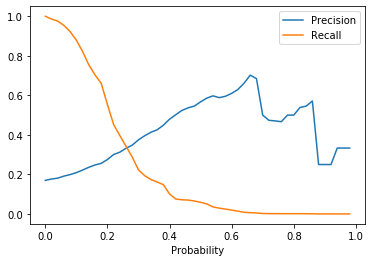

In [48]:
# Use the precision and recall to make a choice of threshold. 

# Let's plot Precision and Recall for the various probabilities
df_cutoffs.plot.line(x='Probability', y=['Precision','Recall'])
plt.show()

### From above plot, we can see that the Precision and Recall roughly converge at probability value = 0.27, which can then be considered as the optimum point for the cutoff probability threshold !!!